In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
da=pd.read_csv('dane_antropo_13.csv')
di=pd.read_csv('dane_inbody.csv')

In [11]:
da

,id,data.badania,DataBadania,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
0,101,2015.09.25,2015.09.25,182.0,96.0,39.0,86.0,89.0,83.0,89.0,...,38.0,27.0,27.0,21.0,14.0,10.0,19.0,128.0,69.0,66.0
1,102,2015.09.25,2015.09.25,167.0,84.4,31.0,72.5,76.0,62.0,81.0,...,32.8,23.8,24.1,17.4,12.0,4.0,6.0,128.0,60.0,75.0
2,104,2015.09.25,2015.09.25,187.4,93.5,35.0,83.0,84.0,68.0,90.0,...,39.4,27.3,26.5,19.1,5.0,9.0,4.0,146.0,83.0,0.0
3,105,2015.09.25,2015.09.25,177.9,90.0,33.0,80.0,86.0,68.0,86.0,...,37.0,26.8,26.0,17.7,11.0,6.0,8.0,121.0,80.0,92.0
4,107,2015.09.25,2015.09.25,161.7,84.8,35.0,90.0,93.0,88.0,98.0,...,34.0,28.0,26.0,20.0,31.0,35.0,46.0,119.0,67.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,509,2019-09-25,2019-09-25,156.2,81.2,33.5,70.0,75.5,64.0,81.0,...,33.0,24.2,22.9,17.2,12.0,7.0,9.0,116.0,68.0,101.0
897,510,2019-09-25,2019-09-25,131.2,67.5,25.0,57.0,60.0,57.0,68.0,...,28.0,20.2,19.1,13.0,15.0,9.5,21.0,87.0,50.0,0.0
898,511,2019-09-25,2019-09-25,152.3,81.3,29.0,68.0,72.0,65.0,85.0,...,31.4,24.2,20.7,17.5,24.0,10.0,27.0,111.0,67.0,50.0
899,601,2019-09-25,2019-09-25,153.5,78.3,29.5,78.0,80.0,70.5,84.0,...,33.4,23.6,24.1,17.8,17.0,10.0,29.0,0.0,0.0,0.0


In [12]:
di

,id,data.badania,Id,DateOfBirth,Age,Sex,DataBadania,Weight,LowerLimit_WeightNormalRange_,UpperLimit_WeightNormalRange_,...,MeasuredCircumferenceofHip_regr,MeasuredCircumferenceofRightArm_regr,MeasuredCircumferenceofLeftArm_regr,MeasuredCircumferenceofRightThigh_regr,MeasuredCircumferenceofLeftThigh_regr,GrowthScore_regr,ObesityDegreeofaChild_regr,LowerLimit_ObesityDegreeofaChildNormalRange__regr,UpperLimit_ObesityDegreeofaChildNormalRange__regr,X.1
0,101,2015.09.25. 09:13:11,1,14.06.2000,15.3,M,2015.09.25. 09:13:11,80.5,62.7,84.8,...,-31.603885,-9.462808,-9.441021,-17.105701,-17.071362,70.802102,56.660586,-196.925513,-38.012722,NaN
1,102,2015.09.25. 09:20:27,2,27.12.2000,14.7,M,2015.09.25. 09:20:27,48.8,51.2,69.3,...,-30.906384,-9.202669,-9.182694,-16.688495,-16.658109,32.374409,28.395836,-194.883593,-37.569795,NaN
2,104,2015.09.25. 09:34:48,3,06.11.2000,14.8,M,2015.09.25. 09:34:48,63.5,66.1,89.5,...,-31.022634,-9.246026,-9.225748,-16.758029,-16.726985,49.445691,27.439961,-195.223913,-37.643616,NaN
3,105,2015.09.25. 09:37:26,4,22.07.2000,15.2,M,2015.09.25. 09:37:26,59.1,59.8,80.8,...,-31.487635,-9.419451,-9.397967,-17.036167,-17.002487,45.730820,32.616461,-196.585193,-37.938901,NaN
4,107,2015.09.25. 09:55:02,6,24.06.2002,13.3,M,2015.09.25. 09:55:02,72.2,46.9,63.5,...,-29.278879,-8.595679,-8.579929,-15.715015,-15.693853,5.376457,81.778087,-190.119114,-36.536298,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,509,2019.09.25. 07:48:35,1187,28.01.2008,11.6,M,2019.09.25. 07:48:35,43.5,42.5,57.5,...,-27.302624,-7.858620,-7.848001,-14.532931,-14.522971,-54.835341,-55.972038,185.666326,-35.281337,NaN
868,510,2019.09.25. 07:39:26,1188,16.06.2009,10.3,F,2019.09.25. 07:39:26,25.3,24.7,33.5,...,-25.791370,-7.294987,-7.288291,-13.628985,-13.627590,-55.762010,-56.545663,190.090486,-34.321661,NaN
869,511,2019.09.25. 07:51:32,1189,09.06.2009,10.3,M,2019.09.25. 07:51:32,44.2,39.4,53.2,...,-25.791370,-7.294987,-7.288291,-13.628985,-13.627590,-55.762010,-56.545663,190.090486,-34.321661,NaN
870,601,2019.09.25. 11:24:38,1191,29.05.2009,10.3,M,2019.09.25. 11:24:38,44.3,40.3,54.5,...,-25.791370,-7.294987,-7.288291,-13.628985,-13.627590,-55.762010,-56.545663,190.090486,-34.321661,NaN


In [13]:
diid=di.iloc[:,0]
diBFM=di.iloc[:,25]
diBFMlow=di.iloc[:,26]
diBFMup=di.iloc[:,27]
dane=pd.DataFrame({"id":diid,"BFM":diBFM, "BFM_LowLim":diBFMlow, "BFM_UpLim":diBFMup})
dane

,id,BFM,BFM_LowLim,BFM_UpLim
0,101,12.5,17.7,8.9
1,102,5.8,14.5,7.2
2,104,5.6,18.7,9.3
3,105,5.1,16.9,8.4
4,107,27.0,13.3,6.6
...,...,...,...,...
867,509,0.0,21.0,20.9
868,510,0.0,9.4,10.9
869,511,0.0,16.5,19.3
870,601,0.0,17.1,19.8


In [14]:
class tworzenie:
    @staticmethod
    def zamiany(x):
        for i in range(len(x)):
            low=x.iloc[i,2]
            up=x.iloc[i,3]
            if low>up:
                x.iloc[i,2]=up
                x.iloc[i,3]=low
        return x
    
    @staticmethod
    def klasa(x):
        for i in range(len(x)):
            low=x.iloc[i,2]
            up=x.iloc[i,3]
            bfm=x.iloc[i,1]
            if bfm<low:
                x.iloc[i,1]=0
            elif bfm>up:
                x.iloc[i,1]=2
            else:
                x.iloc[i,1]=1
        return x

In [15]:
dane2=tworzenie.zamiany(dane)
dane2

,id,BFM,BFM_LowLim,BFM_UpLim
0,101,12.5,8.9,17.7
1,102,5.8,7.2,14.5
2,104,5.6,9.3,18.7
3,105,5.1,8.4,16.9
4,107,27.0,6.6,13.3
...,...,...,...,...
867,509,0.0,20.9,21.0
868,510,0.0,9.4,10.9
869,511,0.0,16.5,19.3
870,601,0.0,17.1,19.8


In [16]:
# czyszczenie rekordów niewłaściwych
beforeCleaningCount = dane2.shape[0]

# usuwanie osób z ilością tłuszczu powyżej 30
dane2 = dane2[dane2.BFM < 30]
# usuwanie osób z ilością tłuszczu poniżej 2
dane2 = dane2[dane2.BFM > 2]

# dane do filtrowania bfm
# https://www.mdpi.com/2227-9067/8/5/366/html
# https://academic.oup.com/advances/article/5/3/320S/4562745?fbclid=IwAR2uOMZ3gcqXruv7ORBiMwDDUu2mSzKWKkSPX5lFdRmupuZpUP2m72H56mI&login=false

In [17]:
dane3=tworzenie.klasa(dane2)
dane3

,id,BFM,BFM_LowLim,BFM_UpLim
0,101,1.0,8.9,17.7
1,102,0.0,7.2,14.5
2,104,0.0,9.3,18.7
3,105,0.0,8.4,16.9
4,107,2.0,6.6,13.3
...,...,...,...,...
494,326,2.0,3.2,6.3
495,983,1.0,7.8,15.5
496,993,0.0,9.4,18.8
497,998,1.0,10.2,20.4


In [18]:
dane3=dane3.drop(['BFM_LowLim', 'BFM_UpLim'], axis=1)
dane3

,id,BFM
0,101,1.0
1,102,0.0
2,104,0.0
3,105,0.0
4,107,2.0
...,...,...
494,326,2.0
495,983,1.0
496,993,0.0
497,998,1.0


In [19]:
wynikowyAntro=pd.merge(da, dane3, how="inner", left_index=True, right_index=True)

wynikowyAntro.head()

,id_x,data.badania,DataBadania,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,...,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,id_y,BFM
0,101,2015.09.25,2015.09.25,182.0,96.0,39.0,86.0,89.0,83.0,89.0,...,27.0,21.0,14.0,10.0,19.0,128.0,69.0,66.0,101,1.0
1,102,2015.09.25,2015.09.25,167.0,84.4,31.0,72.5,76.0,62.0,81.0,...,24.1,17.4,12.0,4.0,6.0,128.0,60.0,75.0,102,0.0
2,104,2015.09.25,2015.09.25,187.4,93.5,35.0,83.0,84.0,68.0,90.0,...,26.5,19.1,5.0,9.0,4.0,146.0,83.0,0.0,104,0.0
3,105,2015.09.25,2015.09.25,177.9,90.0,33.0,80.0,86.0,68.0,86.0,...,26.0,17.7,11.0,6.0,8.0,121.0,80.0,92.0,105,0.0
4,107,2015.09.25,2015.09.25,161.7,84.8,35.0,90.0,93.0,88.0,98.0,...,26.0,20.0,31.0,35.0,46.0,119.0,67.0,88.0,107,2.0


In [20]:
# usuwanie osób z ciśnieniem skurczowym poniżej 60
wynikowyAntro = wynikowyAntro[wynikowyAntro.CisnienieKrwiSkurczowe > 60]
# usuwanie osób z ciśnieniem rozkurczowym poniżej 30
wynikowyAntro = wynikowyAntro[wynikowyAntro.CisnienieKrwiRozkurczowe > 30]
# usuwanie osób z ciśnieniem skurczowym powyżej 181
wynikowyAntro = wynikowyAntro[wynikowyAntro.CisnienieKrwiSkurczowe < 181]
# usuwanie osób z ciśnieniem rozkurczowym powyżej 111
wynikowyAntro = wynikowyAntro[wynikowyAntro.CisnienieKrwiRozkurczowe < 111]
# usuwanie osób z tętnem krwi powyżej 110
wynikowyAntro = wynikowyAntro[wynikowyAntro.TetnoKrwi < 110]
# usuwanie osób z tętnem krwi poniżej 50
wynikowyAntro = wynikowyAntro[wynikowyAntro.TetnoKrwi > 50]
#usuwanie/naprawianie błędnego pomiaru
wynikowyAntro.drop(483, axis=0, inplace=True)
wynikowyAntro.drop(346, axis=0, inplace=True)
wynikowyAntro.drop(162, axis=0, inplace=True)

# dane do filtrowania cisnienia i tetna
# https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465
# https://apteline.pl/artykuly/prawidlowy-puls-za-niski-puls-tetno-prawidlowe-tetno-spoczynkowe-za-wysoki-puls

In [21]:
# po filtrowaniu z bazy zostaje usunięte:
print(f"Dzięki filtrowaniu usunięto: {beforeCleaningCount - wynikowyAntro.shape[0]} rekordów, z {beforeCleaningCount} pozostało {wynikowyAntro.shape[0]}")

Dzięki filtrowaniu usunięto: 508 rekordów, z 872 pozostało 364


In [22]:
dane0=wynikowyAntro
# usuwanie zbednych kolumn
dane0=dane0.drop(['id_x', 'data.badania', 'DataBadania', 'id_y'], axis=1)
dane0

,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,ObwodUda,ObwodRamienia,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,BFM
0,182.0,96.0,39.0,86.0,89.0,83.0,89.0,50.0,29.0,38.0,27.0,27.0,21.0,14.0,10.0,19.0,128.0,69.0,66.0,1.0
1,167.0,84.4,31.0,72.5,76.0,62.0,81.0,43.0,22.0,32.8,23.8,24.1,17.4,12.0,4.0,6.0,128.0,60.0,75.0,0.0
3,177.9,90.0,33.0,80.0,86.0,68.0,86.0,49.0,24.5,37.0,26.8,26.0,17.7,11.0,6.0,8.0,121.0,80.0,92.0,0.0
4,161.7,84.8,35.0,90.0,93.0,88.0,98.0,58.0,27.0,34.0,28.0,26.0,20.0,31.0,35.0,46.0,119.0,67.0,88.0,2.0
5,160.1,86.4,32.0,71.0,74.5,61.0,88.0,54.0,22.0,32.5,25.9,23.3,18.0,16.0,7.0,7.0,125.0,62.0,74.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,139.0,72.3,28.0,58.5,64.0,54.5,70.5,41.0,18.5,27.4,20.9,20.1,14.5,13.5,6.0,12.0,113.0,64.0,92.0,2.0
495,162.8,93.1,30.0,65.0,68.5,62.0,83.5,47.5,20.5,35.0,25.4,23.7,15.1,12.5,13.5,15.5,117.5,70.0,81.0,1.0
496,155.4,80.6,28.0,67.0,70.5,63.5,79.0,44.0,20.0,32.7,23.9,24.0,14.6,12.0,7.0,10.0,100.5,70.0,100.5,0.0
497,182.5,98.0,39.0,100.0,104.0,99.0,117.5,66.0,32.0,40.6,34.9,31.4,24.4,32.0,32.0,32.5,124.0,74.0,97.0,1.0


In [23]:
dane0.describe()

,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,ObwodUda,ObwodRamienia,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,BFM
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,162.073626,84.839286,32.168681,72.982692,77.904670,68.094231,87.383791,49.296978,23.439560,34.459615,25.776374,24.466209,17.255495,15.368132,11.152198,17.318681,117.152473,68.482143,80.861264,0.780220
std,13.554716,6.862544,3.157074,7.833804,8.116959,7.694021,9.747695,6.491810,2.974599,3.552276,2.656847,2.679755,2.173874,6.373622,6.133507,9.501128,12.470438,8.220051,12.873002,0.681146
min,130.500000,67.800000,26.000000,56.700000,61.500000,52.000000,48.000000,32.500000,16.000000,23.000000,17.400000,18.300000,12.000000,3.000000,3.000000,4.000000,76.000000,39.000000,52.000000,0.000000
25%,153.475000,80.375000,30.000000,67.500000,72.000000,63.000000,81.000000,45.000000,21.500000,32.300000,23.900000,22.675000,15.800000,11.000000,7.500000,9.000000,109.375000,63.000000,71.750000,0.000000
50%,163.000000,85.450000,32.000000,72.000000,77.000000,67.000000,88.000000,49.000000,23.000000,34.450000,25.900000,24.200000,17.000000,14.750000,9.500000,16.000000,117.500000,69.000000,80.750000,1.000000
75%,171.225000,89.825000,34.000000,77.000000,83.000000,72.500000,94.000000,53.000000,25.000000,36.900000,27.425000,26.200000,18.500000,19.125000,13.000000,23.000000,125.000000,74.000000,89.625000,1.000000
max,196.000000,101.000000,41.000000,108.000000,112.000000,99.000000,117.500000,90.000000,35.000000,44.000000,37.700000,33.700000,27.500000,38.000000,39.000000,56.000000,153.500000,94.500000,109.000000,2.000000


In [24]:
list1 = dane0.iloc[0: ,19]
print("Ilosc klas w aktualnej bazie: ",Counter(list1))

Ilosc klas w aktualnej bazie:  Counter({1.0: 178, 0.0: 133, 2.0: 53})


In [25]:
# Normalizacja

In [26]:
zapas=dane0[['BFM']]
dane0=dane0.drop(['BFM'], axis=1)

In [31]:
dane0_n_n = MinMaxScaler().fit_transform(dane0)
dane0_n=pd.DataFrame(data=dane0_n_n, columns=list(dane0.columns.values))
dane0_n.insert(19,'BFM',zapas)
dane0_n

,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,ObwodUda,ObwodRamienia,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,BFM
0,0.786260,0.849398,0.866667,0.571150,0.544554,0.659574,0.589928,0.304348,0.684211,0.714286,0.472906,0.564935,0.580645,0.314286,0.194444,0.288462,0.670968,0.540541,0.245614,1.0
1,0.557252,0.500000,0.333333,0.307992,0.287129,0.212766,0.474820,0.182609,0.315789,0.466667,0.315271,0.376623,0.348387,0.257143,0.027778,0.038462,0.670968,0.378378,0.403509,0.0
2,0.723664,0.668675,0.466667,0.454191,0.485149,0.340426,0.546763,0.286957,0.447368,0.666667,0.463054,0.500000,0.367742,0.228571,0.083333,0.076923,0.580645,0.738739,0.701754,0.0
3,0.476336,0.512048,0.600000,0.649123,0.623762,0.765957,0.719424,0.443478,0.578947,0.523810,0.522167,0.500000,0.516129,0.800000,0.888889,0.807692,0.554839,0.504505,0.631579,2.0
4,0.451908,0.560241,0.400000,0.278752,0.257426,0.191489,0.575540,0.373913,0.315789,0.452381,0.418719,0.324675,0.387097,0.371429,0.111111,0.057692,0.632258,0.414414,0.385965,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.129771,0.135542,0.133333,0.035088,0.049505,0.053191,0.323741,0.147826,0.131579,0.209524,0.172414,0.116883,0.161290,0.300000,0.083333,0.153846,0.477419,0.450450,0.701754,2.0
360,0.493130,0.762048,0.266667,0.161793,0.138614,0.212766,0.510791,0.260870,0.236842,0.571429,0.394089,0.350649,0.200000,0.271429,0.291667,0.221154,0.535484,0.558559,0.508772,1.0
361,0.380153,0.385542,0.133333,0.200780,0.178218,0.244681,0.446043,0.200000,0.210526,0.461905,0.320197,0.370130,0.167742,0.257143,0.111111,0.115385,0.316129,0.558559,0.850877,0.0
362,0.793893,0.909639,0.866667,0.844055,0.841584,1.000000,1.000000,0.582609,0.842105,0.838095,0.862069,0.850649,0.800000,0.828571,0.805556,0.548077,0.619355,0.630631,0.789474,1.0


In [32]:
dane0_n.describe()

,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,ObwodUda,ObwodRamienia,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,BFM
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.482040,0.513231,0.411245,0.317401,0.324845,0.342430,0.566673,0.292121,0.391556,0.545696,0.412629,0.400403,0.339064,0.353375,0.226450,0.256128,0.531000,0.531210,0.506338,0.780220
std,0.206942,0.206703,0.210472,0.152706,0.160732,0.163703,0.140255,0.112901,0.156558,0.169156,0.130879,0.174010,0.140250,0.182103,0.170375,0.182714,0.160909,0.148109,0.225842,0.681146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350763,0.378765,0.266667,0.210526,0.207921,0.234043,0.474820,0.217391,0.289474,0.442857,0.320197,0.284091,0.245161,0.228571,0.125000,0.096154,0.430645,0.432432,0.346491,0.000000
50%,0.496183,0.531627,0.400000,0.298246,0.306931,0.319149,0.575540,0.286957,0.368421,0.545238,0.418719,0.383117,0.322581,0.335714,0.180556,0.230769,0.535484,0.540541,0.504386,1.000000
75%,0.621756,0.663404,0.533333,0.395712,0.425743,0.436170,0.661871,0.356522,0.473684,0.661905,0.493842,0.512987,0.419355,0.460714,0.277778,0.365385,0.632258,0.630631,0.660088,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [33]:
# Klasyfikacja

In [34]:
X = dane0_n.iloc[:,:19].values
y = dane0_n['BFM'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy :  40.39 %


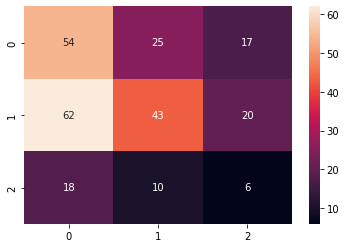

In [37]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy1=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy1, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [38]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score : %.3f' %f1)

accuracy: 0.404
precision: 0.365
recall: 0.361
f1-score : 0.350


Accuracy :  45.49 %


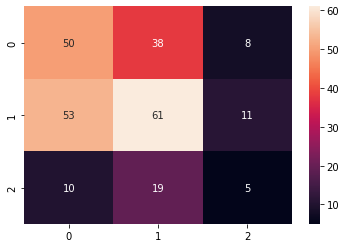

In [39]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy2=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy2, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [40]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score : %.3f' %f1)

accuracy: 0.455
precision: 0.389
recall: 0.385
f1-score : 0.384


Accuracy :  42.75 %


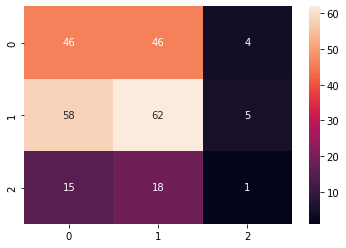

In [41]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy3=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy3, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [42]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score : %.3f' %f1)

accuracy: 0.427
precision: 0.326
recall: 0.335
f1-score : 0.322


Accuracy :  40.39 %


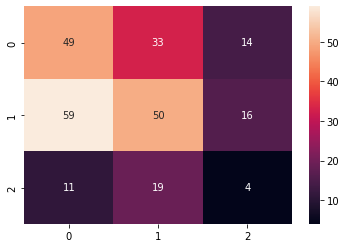

In [43]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy4=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy4, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [44]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score : %.3f' %f1)

accuracy: 0.404
precision: 0.340
recall: 0.343
f1-score : 0.338


Accuracy :  47.84 %


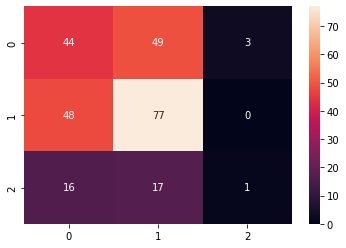

In [45]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy5=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy5, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [46]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score : %.3f' %f1)

accuracy: 0.478
precision: 0.399
recall: 0.368
f1-score : 0.353


In [47]:
results = pd.DataFrame({
   'Model': [ 'Bayes', 
              'LogisticRegression',
              'KNeighbors',
              'DecisionTree',
              'RandomForest'],
    "Accuracy_score":[accuracy1,
                      accuracy2,
                      accuracy3,
                      accuracy4,
                      accuracy5
                     ]})

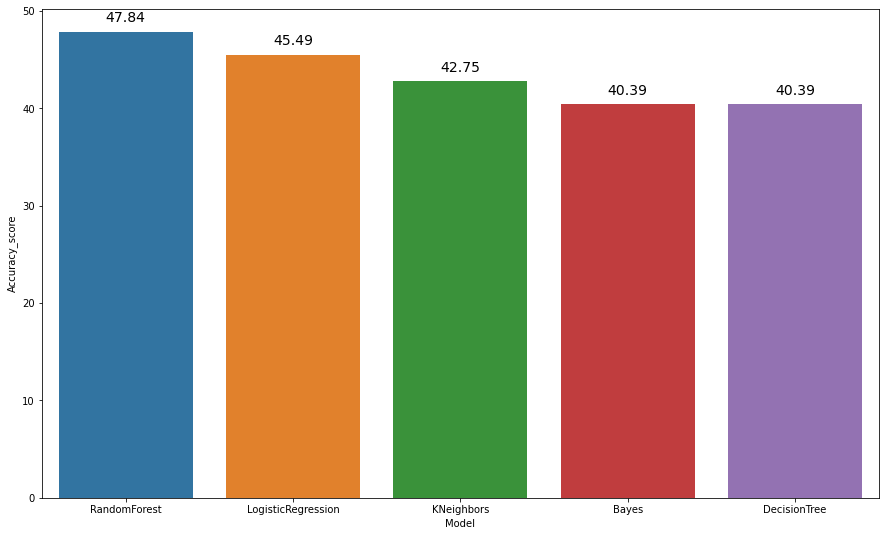

In [48]:
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
plt.subplots(figsize=(15,9))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])

for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 14, color = 'black')